In [ ]:
# The following are the features we'll use to predict our target variable (heart disease or no heart disease).

# age - age in years
# sex - (1 = male; 0 = female)
# cp - chest pain type
# 0: Typical angina: chest pain related decrease blood supply to the heart
# 1: Atypical angina: chest pain not related to heart
# 2: Non-anginal pain: typically esophageal spasms (non heart related)
# 3: Asymptomatic: chest pain not showing signs of disease
# trestbps - resting blood pressure (in mm Hg on admission to the hospital)
# anything above 130-140 is typically cause for concern
# chol - serum cholestoral in mg/dl
# serum = LDL + HDL + .2 * triglycerides
# above 200 is cause for concern
# fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# '>126' mg/dL signals diabetes
# restecg - resting electrocardiographic results
# 0: Nothing to note
# 1: ST-T Wave abnormality
# can range from mild symptoms to severe problems
# signals non-normal heart beat
# 2: Possible or definite left ventricular hypertrophy
# Enlarged heart's main pumping chamber
# thalach - maximum heart rate achieved
# exang - exercise induced angina (1 = yes; 0 = no)
# oldpeak - ST depression induced by exercise relative to rest
# looks at stress of heart during excercise
# unhealthy heart will stress more
# slope - the slope of the peak exercise ST segment
# 0: Upsloping: better heart rate with excercise (uncommon)
# 1: Flatsloping: minimal change (typical healthy heart)
# 2: Downslopins: signs of unhealthy heart
# ca - number of major vessels (0-3) colored by flourosopy
# colored vessel means the doctor can see the blood passing through
# the more blood movement the better (no clots)
# thal - thalium stress result
# 1,3: normal
# 6: fixed defect: used to be defect but ok now
# 7: reversable defect: no proper blood movement when excercising
# target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [11]:
#import all the tools we need

#regular EDA(Exploratory data analysis)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plot display inside in notbook
%matplotlib inline

# Models from Sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evalution

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [12]:
### Loading Data

df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

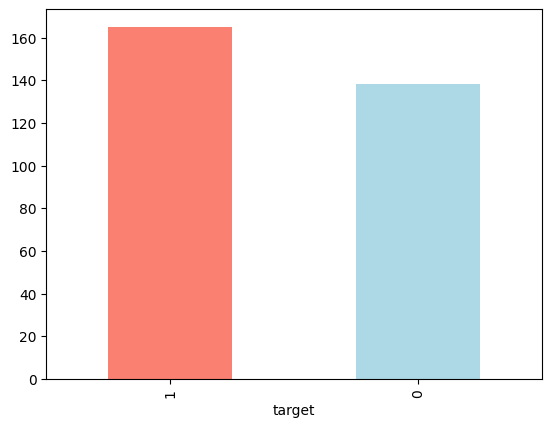

In [14]:
df["target"].value_counts().plot(kind= "bar", color = ["Salmon", "lightblue"]);

In [15]:
# CHeckthe missing value

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df["sex"]

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [ ]:
## Comparison Between sex and Target

In [17]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [18]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


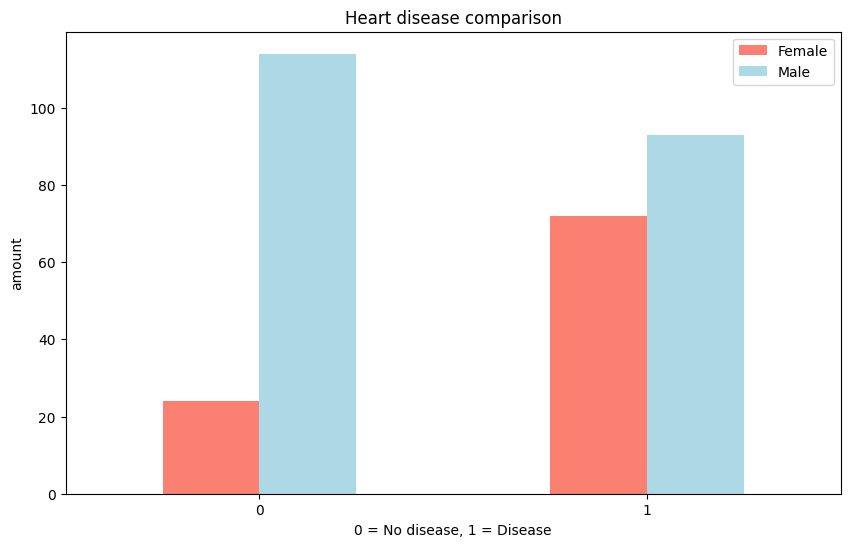

In [19]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (10, 6), 
                                                   color = ["salmon", "lightblue"])
plt.title("Heart disease comparison")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


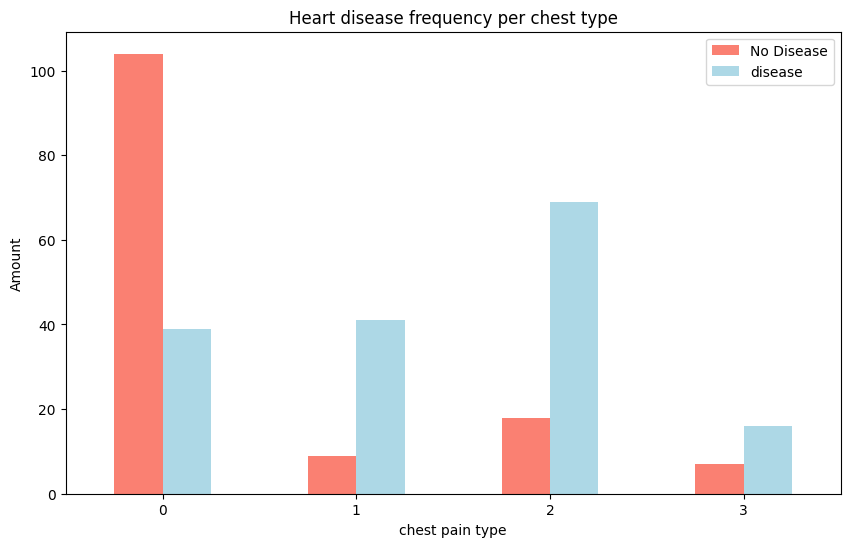

In [21]:
## Make the crosstab visual 

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color = ["salmon", "lightblue"])
plt.title("Heart disease frequency per chest type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "disease"])
plt.xticks(rotation=0);

In [ ]:
### We are trying to 3 different models

# LogisticRegression
# KNeighborsClassifier
# RandomForestClassifier

In [22]:
x = df.drop("target", axis = 1)
y = df["target"]

#split the data into Xtest and Ytest

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [23]:
# Put these models in a dictionary

models = {"LogisticRegression": LogisticRegression(), 
          "KNeighborsClassifier": KNeighborsClassifier(),
          "RandomForestClassifier": RandomForestClassifier()}
# creat a function to fit and score model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fit and evalute given models
    """
    np.random.seed(42)

    # Make a dictionary to keep the model score
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [24]:
model_scores = fit_and_score(models = models, x_train = x_train, x_test = x_test,
                             y_train=y_train, y_test=y_test)
model_scores

c:\Users\840G3\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

<Axes: >

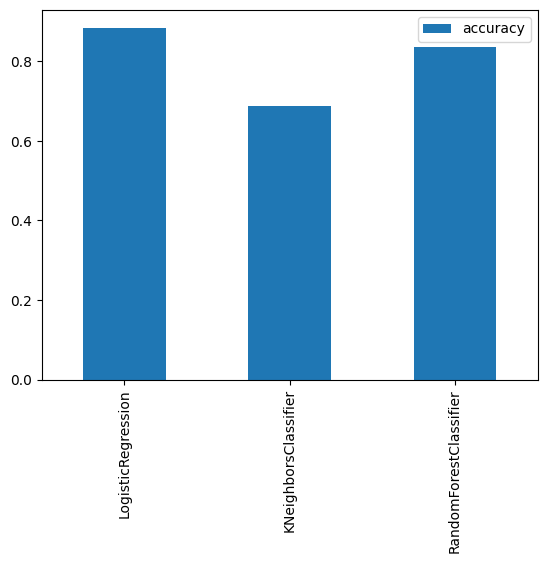

In [25]:
## model comparison 

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [26]:
### Hyperperamter Tunning 

train_score = []
test_score = []

## Different values for n_neighbours

neighbours = range(1, 21)

## Setup kNN instance

knn = KNeighborsClassifier()

## Start loop

for i in neighbours:
    knn.set_params(n_neighbors = i)
    ## Fit the algorithm 
    knn.fit(x_train, y_train)
    
    ## Update the trainning score
    train_score.append(knn.score(x_train, y_train))

    ## Update the test score
    test_score.append(knn.score(x_test, y_test))

In [27]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

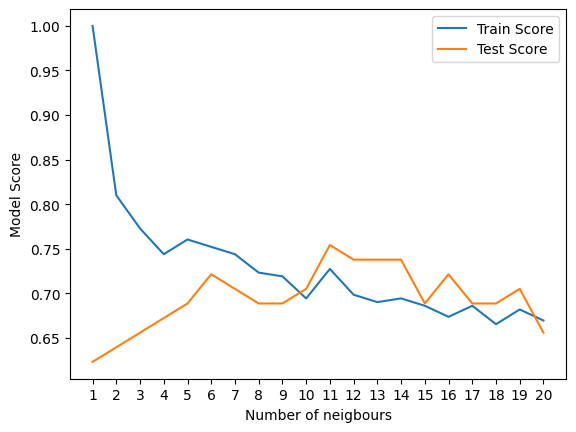

In [29]:
plt.plot(neighbours, train_score, label = "Train Score")
plt.plot(neighbours, test_score, label = "Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neigbours")
plt.ylabel("Model Score")
plt.legend();

In [ ]:
## Hyperperameter Tunning with randomizedsearchCV

## we are going to tune

# LogisticRegression
# RandomForestClassifier
# using RandomizedSearchCV

In [30]:
import numpy as np

In [47]:
### Creat hyperperameter grid for logisticRegression

log_grd_reg = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

### creat hyperperameter grid for RandomForestClassifier
rf_grd = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [50]:
## Lets them our models through RandomizedSearchCV
np.random.seed(42)
rs_grd = RandomizedSearchCV(LogisticRegression(), param_distributions = log_grd_reg, 
                            cv=5, n_iter=20, verbose=True)
rs_grd.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [51]:
rs_grd.score(x_test, y_test)

0.8852459016393442

In [53]:
### Creat hyperperameter grid for RandomForestClassifier

log_grd_rfc = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

### creat hyperperameter grid for RandomForestClassifier
rfc_grd = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [54]:
np.random.seed(42)
rs_grd = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rfc_grd, 
                            cv=5, n_iter=20, verbose=True)
rs_grd.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [55]:
rs_grd.score(x_test, y_test)

0.8688524590163934

In [56]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNeighborsClassifier': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

In [57]:
log_grd_reg = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_grd_reg,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [58]:
# Evaluate the model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [59]:
# Evaluating a classification model, beyond accuracy
# Now we've got a tuned model, let's get some of the metrics we discussed before.

# We want:

# ROC curve and AUC score - RocCurveDisplay()
# Note: This was previously sklearn.metrics.plot_roc_curve(), as of Scikit-Learn version 1.2+, it is sklearn.metrics.RocCurveDisplay().
# Confusion matrix - confusion_matrix()
# Classification report - classification_report()
# Precision - precision_score()
# Recall - recall_score()
# F1-score - f1_score()



# Model Evalution

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [60]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)

In [61]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [62]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [63]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [ ]:
# Since we've got our prediction values we can find the metrics we want.

# Let's start with the ROC curve display and AUC scores.

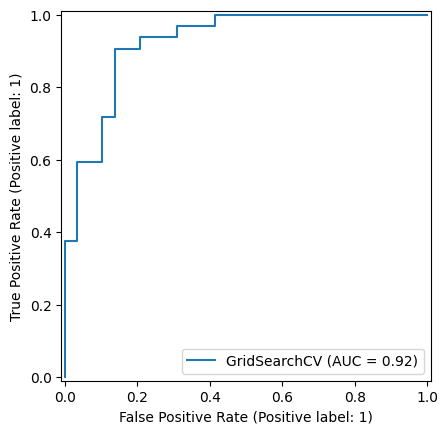

In [67]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=x_test, 
                               y=y_test);


In [69]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds)) 

[[25  4]
 [ 3 29]]


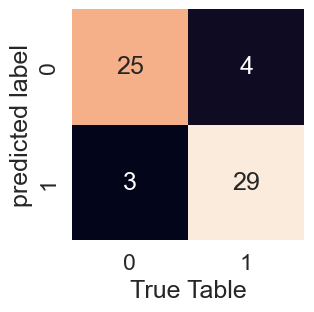

In [71]:
sns.set(font_scale=1.5)

def plot_con_mtr(y_test, y_preds):
    """
     Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True Table")
    plt.ylabel("predicted label")
plot_con_mtr(y_test, y_preds)

In [72]:
# Now get classification report as well as cross validation, reall and F1 score

print(classification_report(y_test, y_preds)) 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [73]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [74]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")


In [77]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [78]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [79]:
# Cross-validated precision score 
cv_acc_precisiom = cross_val_score(clf, x, y, cv = 5, scoring="precision")

cv_acc_precisiom = np.mean(cv_acc_precisiom)
cv_acc_precisiom

0.8215873015873015

In [81]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [83]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

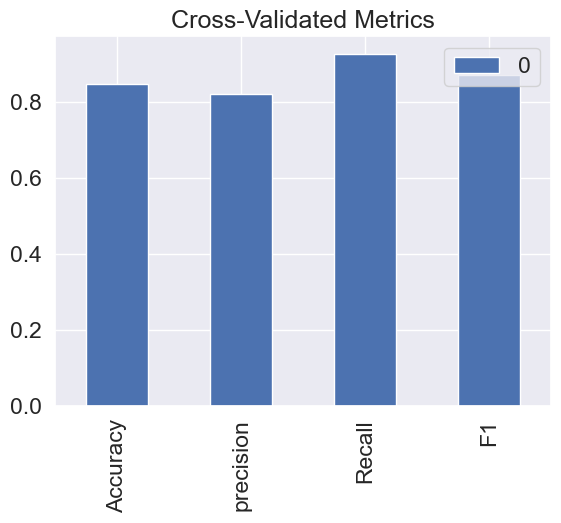

In [87]:
# Visualizing cross-validated metrics

cv_metrices = pd.DataFrame({"Accuracy" : cv_acc, "precision": cv_acc_precisiom,
                            "Recall": cv_recall, "F1": cv_f1}, index=[0])
cv_metrices.T.plot.bar(title = "Cross-Validated Metrics", legend = "False");



In [88]:
# Feature importance

clf.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [89]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [91]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
# Match features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

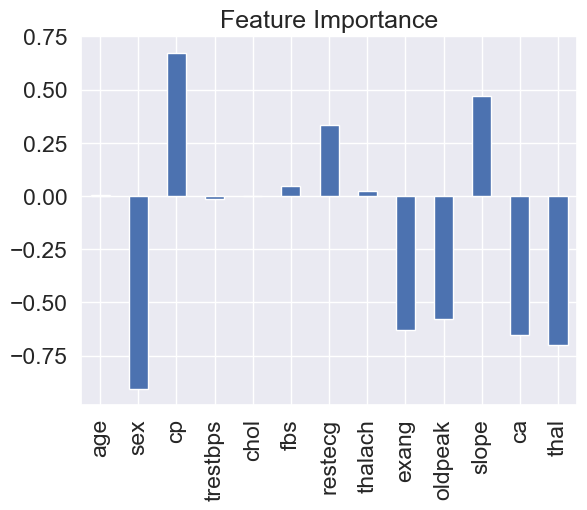

In [95]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

In [ ]:
# 6. Experimentation
# If you haven't hit your evaluation metric yet... ask yourself...

# Could you collect more data?
# Could you try a better model? Like CatBoost or XGBoost?
# Could you improve the current models? (beyond what we've done so far)
# If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?